In [ ]:
from sympy import primefactors, divisors
dvs = set((1,2,))
terms = [2,]

for i in range(30):
    t = 3
    while True:
        k = 0
        for j in divisors(t):
            if j not in dvs:
                k+=1
                if k >= 2:break
        if k >= 2:break 
        t+=1
    terms.append(t)
    dvs.update(divisors(t))

print(terms)

print([(terms[i] - terms[i-1])//2 for i in range(1, len(terms))])

[2, 6, 8, 10, 14, 18, 22, 24, 26, 30, 32, 34, 38, 40, 42, 46, 50, 54, 56, 58, 62, 66, 70, 72, 74, 78, 82, 86, 88, 90, 94]
[1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1]


In [ ]:
from sympy import prod

def powerset(iterable):
    from itertools import chain, combinations
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

get_digits = lambda t: [int(i) for i in format(t, 'b')]
get_sum_p = lambda t: sum([sum(j) for j in powerset(get_digits(t)) if len(j)!=0])

# print(get_sum_p(123456))
terms = [get_sum_p(i) for i in range(1, 1000)]

print(terms)

[1, 2, 4, 4, 8, 8, 12, 8, 16, 16, 24, 16, 24, 24, 32, 16, 32, 32, 48, 32, 48, 48, 64, 32, 48, 48, 64, 48, 64, 64, 80, 32, 64, 64, 96, 64, 96, 96, 128, 64, 96, 96, 128, 96, 128, 128, 160, 64, 96, 96, 128, 96, 128, 128, 160, 96, 128, 128, 160, 128, 160, 160, 192, 64, 128, 128, 192, 128, 192, 192, 256, 128, 192, 192, 256, 192, 256, 256, 320, 128, 192, 192, 256, 192, 256, 256, 320, 192, 256, 256, 320, 256, 320, 320, 384, 128, 192, 192, 256, 192, 256, 256, 320, 192, 256, 256, 320, 256, 320, 320, 384, 192, 256, 256, 320, 256, 320, 320, 384, 256, 320, 320, 384, 320, 384, 384, 448, 128, 256, 256, 384, 256, 384, 384, 512, 256, 384, 384, 512, 384, 512, 512, 640, 256, 384, 384, 512, 384, 512, 512, 640, 384, 512, 512, 640, 512, 640, 640, 768, 256, 384, 384, 512, 384, 512, 512, 640, 384, 512, 512, 640, 512, 640, 640, 768, 384, 512, 512, 640, 512, 640, 640, 768, 512, 640, 640, 768, 640, 768, 768, 896, 256, 384, 384, 512, 384, 512, 512, 640, 384, 512, 512, 640, 512, 640, 640, 768, 384, 512, 512, 640,

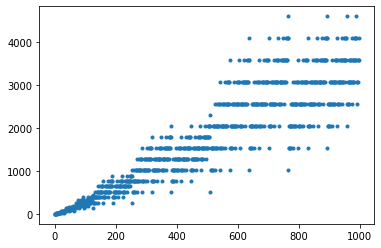

In [ ]:
import matplotlib.pyplot as plt
plt.plot(terms, '.')
# plt.yscale('log')


# plt.ylabel('len(gcd3(s))')
# plt.xlabel('len(s)')
plt.show()

In [ ]:
def powerset(iterable):
    from itertools import chain, combinations
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))
get_digits1 = lambda t:''.join([''.join(i) for i in powerset(format(t, 'b'))])
terms = [int(get_digits1(i),2) for i in range(1, 20)]

print(terms)

[1, 10, 15, 2372, 2925, 3542, 4095, 2323681800, 2596640409, 2878518058, 3151476667, 3467172428, 3740131037, 4022008686, 4294967295, 629550502335365069738000, 667479494209514360746545, 705708534334060005250130, 743637526208209296258675]


[0.834032445247956, 0.996228892951395, 2.05046174964467, 2.07706995164025, 2.10076835220353, 2.11836437348616, 3.07113741729153, 3.07627413183312, 3.08101697649182, 3.08516782067684, 3.08952335631793, 3.09296725811391, 3.09625824959142, 3.09922298220757, 4.00367729294466, 4.00474430282814, 4.00575902442284, 4.00671191361109]


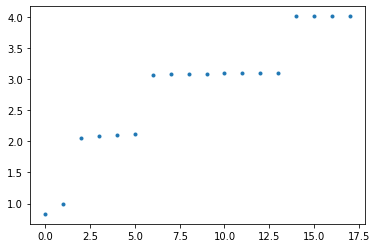

In [ ]:
import matplotlib.pyplot as plt
from sympy import log 
from sympy import N

terms2 = [ N(log(log(i))) for i in terms[1:]]
print(terms2)
plt.plot(terms2, '.')
# plt.yscale('log')


# plt.ylabel('len(gcd3(s))')
# plt.xlabel('len(s)')
plt.show()

In [48]:
from sympy import prod
from math import gcd

terms = [2,]
seen  = set()

for i in range(7):
    t = 2
    p = prod(terms)
    while gcd(p, t) == 1 or t in seen: t+=1

    terms.append(t)
    seen.add(t)
    #print(terms)

print(terms)

[2, 2, 4, 6, 3, 8, 9, 10]


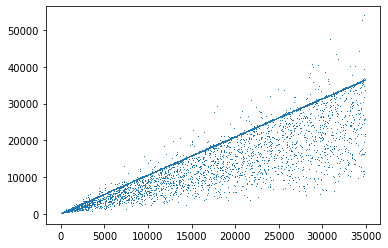

In [47]:
import matplotlib.pyplot as plt
plt.plot(terms, ',')
#plt.plot([terms[i]/(2*i) for i in range(1,len(terms))], '.')
# plt.yscale('log')

plt.show()